# Ejercicios 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

## 1.-Pesos en la función de correlación (estimador de Landy-Salay)

Modifiqué las funciones que calculaban los histogramas para que usen los pesos que vamos a asignar a los anillos y otra función que los calcule de la manera normal

In [2]:
def DD_peso(N,L,r,num_bins, Lmax, Lmin):
    rango=(Lmax-Lmin)/num_bins
    cuentas=np.zeros(num_bins, dtype=float)
    
    for i in range(N):
        for j in range(i+1,N):              
            dr = r[j,:2]-r[i,:2]
            Dr = np.sqrt(sum(dr*dr))    
            if Dr<(Lmax-0.1) and Dr>Lmin:
                bin_number = int(Dr // rango)-int(Lmin//rango)
                if bin_number==num_bins:
                    bin_number-=1
                cuentas[bin_number] += r[j,2]*r[i,2] 

    return cuentas

def DD(N,L,r,num_bins, Lmax, Lmin):
    rango=(Lmax-Lmin)/num_bins
    cuentas=np.zeros(num_bins, dtype=float)
    
    for i in range(N):
        for j in range(i+1,N):              
            dr = r[j,:2]-r[i,:2]
            Dr = np.sqrt(sum(dr*dr))    
            if Dr<(Lmax-0.1) and Dr>Lmin:
                bin_number = int(Dr // rango)-int(Lmin//rango)
                if bin_number==num_bins:
                    bin_number-=1
                cuentas[bin_number] += 1        

    return cuentas


In [3]:
def DR_peso(N,M,L,r,d,num_bins,Lmax,Lmin):
    rango=(Lmax-Lmin)/num_bins
    cuentas=np.zeros(num_bins, dtype=float)
 
    for i in range(N):
        for j in range(M):              
            dr = r[i,:2]-d[j,:2]
            Dr = np.sqrt(sum(dr*dr))
            if Dr<Lmax and Dr>Lmin:
                bin_number = int(Dr // rango)-int(Lmin//rango)
                if bin_number==num_bins:
                    bin_number-=1
                cuentas[bin_number] += d[j,2]*r[i,2]

    return cuentas

def DR(N,M,L,r,d,num_bins,Lmax,Lmin):
    rango=(Lmax-Lmin)/num_bins
    cuentas=np.zeros(num_bins, dtype=float)
 
    for i in range(N):
        for j in range(M):              
            dr = r[i,:2]-d[j,:2]
            Dr = np.sqrt(sum(dr*dr))
            if Dr<Lmax and Dr>Lmin:
                bin_number = int(Dr // rango)-int(Lmin//rango)
                if bin_number==num_bins:
                    bin_number-=1
                cuentas[bin_number] += 1

    return cuentas




### a) Construye dos anillos concéntricos de radios distintos y ancho fijo, pero que el radio mayor del anillo más pequeño sea igual al radio menor del anillo más grande (ie ambos anillos deben de verse como un solo anillo del doble de ancho). La densidad de ambos anillos debe de ser igual. Grafica la distribución poniendo color rojo a los puntos del anillo pequeño y azul a los del grande.

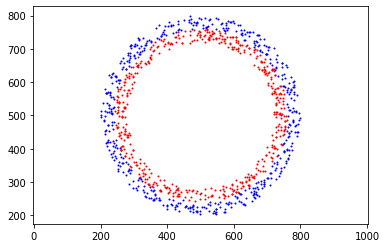

In [4]:
def Anillo(R0,Rf,N,L):
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2)

    datos_anillo=np.zeros(shape=(N,2), dtype=float)
    datos_anillo[:,0] = r * np.cos( phi)+L/2
    datos_anillo[:,1] = r * np.sin( phi)+L/2
    return datos_anillo
R01=260
Rf1=300
N=500
L=1000

R02=220
Rf2=260
N=500
L=1000
datos_anillo1=Anillo(R01,Rf1,N,L)
datos_anillo2=Anillo(R02,Rf2,N,L)

plt.scatter(datos_anillo1[:,0],datos_anillo1[:,1], s=1,c='b')
plt.scatter(datos_anillo2[:,0],datos_anillo2[:,1], s=1,c='r')
plt.figsize=(40,40)
plt.axis('equal')
plt.show()



#para puntos en el anillo pequeño (rojos) usa un peso de 2, mientras que para puntos en el anillo grande (azules) usa 1/2. 
datos_peso1=np.c_[ datos_anillo1, 2*np.ones(N) ]
datos_peso2=np.c_[ datos_anillo2, 0.5*np.ones(N) ]

anillo_pesado=np.r_[datos_peso1,datos_peso2]


Calculo los histogramas con peso y sin peso para ver la diferencia que produce el peso en el histograma

In [5]:
L=1000
Lmax=650
Lmin=400
num_bins=40
histo_pesado=DD_peso(len(anillo_pesado),L,anillo_pesado,num_bins, Lmax, Lmin)
histo=DD(len(anillo_pesado),L,anillo_pesado,num_bins, Lmax, Lmin)

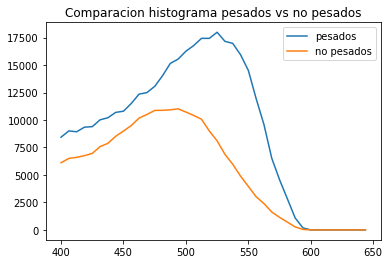

In [6]:
langs = np.arange(Lmin,Lmax,(Lmax-Lmin)/num_bins)
plt.plot(langs,histo_pesado, label='pesados')
plt.plot(langs,histo, label='no pesados')
plt.title('Comparacion histograma pesados vs no pesados')
plt.legend()
plt.show()

In [7]:

def Dat_random(N,L):
    datos_random= np.zeros(shape=(N,2), dtype=float)
    datos_random[:,0]=np.random.uniform(0.0,L ,N)
    datos_random[:,1] = np.random.uniform(0.0,L ,N)
    return datos_random
N=1000
L=1000

datos_random=Dat_random(N,L)
datos_random=np.c_[ datos_random, np.ones(N) ]

### b) Mide la función de correlación asignando los siguientes pesos a cada punto: para puntos en el anillo pequeño (rojos) usa un peso de 2, mientras que para puntos en el anillo grande (azules) usa 1/2. Sobrepon en una gráfica la función de correlación sin pesos con la de pesos, y describe las diferencias en palabras.


In [8]:
L=1000
Lmax=650
Lmin=300
num_bins=40
anillo_DD=DD_peso(len(anillo_pesado),L,anillo_pesado,num_bins, Lmax, Lmin)
RR=DD_peso(len(datos_random),L,datos_random,num_bins, Lmax, Lmin)
anillo_DR=DR_peso(len(datos_random),len(anillo_pesado),L,datos_random,anillo_pesado,num_bins,Lmax,Lmin)
FC_Landy=np.divide(anillo_DD,RR)-2*np.divide(anillo_DR,RR)+1

In [9]:
anillo_DD2=DD(len(anillo_pesado),L,anillo_pesado,num_bins, Lmax, Lmin)
RR2=DD(len(datos_random),L,datos_random,num_bins, Lmax, Lmin)
anillo_DR2=DR(len(datos_random),len(anillo_pesado),L,datos_random,anillo_pesado,num_bins,Lmax,Lmin)
FC_Landy2=np.divide(anillo_DD2,RR2)-2*np.divide(anillo_DR2,RR2)+1

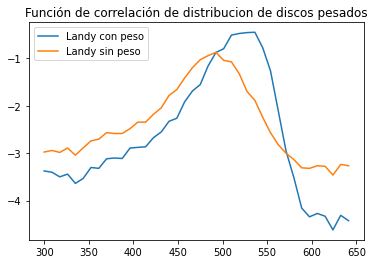

In [10]:
langs = np.arange(Lmin,Lmax,(Lmax-Lmin)/num_bins)
plt.plot(langs,FC_Landy,label='Landy con peso')
plt.plot(langs,FC_Landy2,label='Landy sin peso')
plt.legend()
plt.title('Función de correlación de distribucion de anillo pesado')
plt.show()

Se puede ver que en el rango de distancias del anillo interno la función de correlación que tiene peso está por debajo de la que no tiene peso, ahí el histograma con peso aumentaría 1/4 cada muestra, mientras que sin peso sería 1. En el punto donde se mezclan los anillos, una distancia con un punto rojo y uno azul, las funciones de correlación son iguales. Esto tiene sentido ya que en los dos histogramas se sumaría 1. Pasando este punto la función de correlación con peso crece más que la que no tiene peso, esto debido a que se suma 4 en vez de 1 al histograma. 

## 2.- De partículas a una malla. Usa la rutina scipy.interpolate.griddata. Sugerencia revisa el ejemplo de las notas de clase y el de la página anterior.

Agrego la distribución de puntos de multiples anillos, a los que les doy un peso de 1/2 y 2 por anillo al azar, después calculo la función de distribución para poder compararla posteriormente con la obtenida por las mallas.


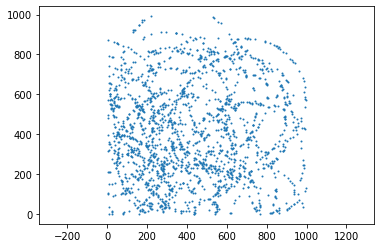

In [12]:
N=70 #numero puntos por anillo
NA=40 #numero de anillos
R0=290 #radio interior
Rf=300 #radio exterior

datos_anillos=np.zeros(shape=(N*NA,2), dtype=float)
x=[]
y=[]
for i in range(NA):
    x0=np.random.uniform(-100,800)
    y0=np.random.uniform(-100,800)
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2) 
    x=np.append(x,[r * np.cos( phi) +x0])
    y=np.append(y,[r * np.sin( phi) +y0])

datos_anillos[:,0]=x
datos_anillos[:,1]=y

datos_anillos=datos_anillos[datos_anillos[:,0]>= 0]
datos_anillos=datos_anillos[datos_anillos[:,1]>= 0]
datos_anillos=datos_anillos[datos_anillos[:,0]<= 1000]
datos_anillos=datos_anillos[datos_anillos[:,1]<= 1000]

if len(datos_anillos)%2 != 0:
    print(len(datos_anillos))
    datos_anillos.pop(0)
    print(len(datos_anillos))

peso=np.r_[ 0.5*np.ones(int(len(datos_anillos)/2)), 2*np.ones(int(len(datos_anillos)/2)) ]

anillos_pesados=np.c_[datos_anillos, peso]

plt.scatter(datos_anillos[:,0],datos_anillos[:,1], s=1)
plt.figsize=(40,40)
plt.axis('equal')
plt.show()


In [13]:
L=1000
Lmax=650
Lmin=300
num_bins=40
anillos_DD=DD_peso(len(anillos_pesados),L,anillos_pesados,num_bins, Lmax, Lmin)
RR=DD_peso(len(datos_random),L,datos_random,num_bins, Lmax, Lmin)
anillos_DR=DR_peso(len(datos_random),len(anillos_pesados),L,datos_random,anillos_pesados,num_bins,Lmax,Lmin)
FC_Landy_anillos=np.divide(anillos_DD,RR)-2*np.divide(anillos_DR,RR)+1

In [14]:
anillos_DD2=DD(len(anillos_pesados),L,anillos_pesados,num_bins, Lmax, Lmin)
RR2=DD(len(datos_random),L,datos_random,num_bins, Lmax, Lmin)
anillos_DR2=DR(len(datos_random),len(anillos_pesados),L,datos_random,anillos_pesados,num_bins,Lmax,Lmin)
FC_Landy2_anillos=np.divide(anillos_DD2,RR2)-2*np.divide(anillos_DR2,RR2)+1

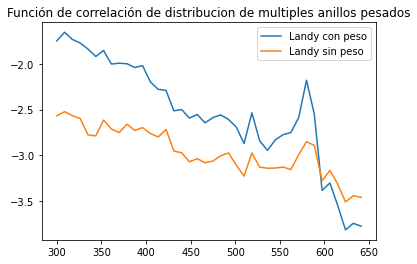

In [31]:
langs = np.arange(Lmin,Lmax,(Lmax-Lmin)/num_bins)
plt.plot(langs,FC_Landy_anillos,label='Landy con peso')
plt.plot(langs,FC_Landy2_anillos,label='Landy sin peso')
plt.legend()
plt.title('Función de correlación de distribucion de multiples anillos pesados')
plt.show()

### a) Crea una malla de 100x100, e interpola los datos del anillo y de los multiples anillos a esta malla. Grafíca los datos de la malla como gráfica de densidad y pon los puntos originales encimados. Llamaremos a esta malla y sus valores, el campo. Utiliza los tres métodos de interpolación: más cercano, lineal y cúbico 1D.

In [16]:
x1=anillos_pesados[:,0]
y1=anillos_pesados[:,1]
z1=anillos_pesados[:,2]

xi1=yi1=np.arange(0,1000.01,10.01)
xi1,yi1=np.meshgrid(xi1,yi1)


zi_cubic_anillos=griddata((anillos_pesados[:,0],anillos_pesados[:,1]),anillos_pesados[:,2], (xi1,yi1), method='cubic')
zi_linear_anillos=griddata((anillos_pesados[:,0],anillos_pesados[:,1]),anillos_pesados[:,2], (xi1,yi1), method='linear')
zi_nearest_anillos=griddata((anillos_pesados[:,0],anillos_pesados[:,1]),anillos_pesados[:,2], (xi1,yi1), method='nearest')


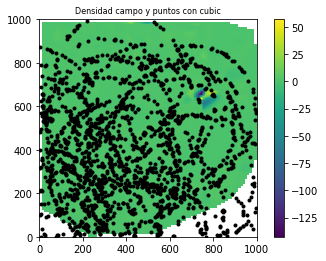

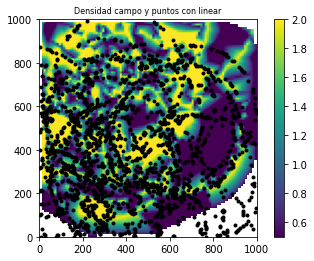

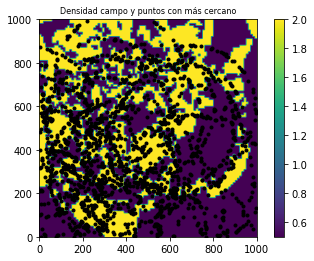

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(zi_cubic_anillos,extent=[0,1000,0,1000])
plt.plot(x1,y1,'k.')
plt.colorbar(im)
plt.title('Densidad campo y puntos con cubic', fontsize=8)
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(zi_linear_anillos,extent=[0,1000,0,1000])
plt.plot(x1,y1,'k.')
plt.colorbar(im)
plt.title('Densidad campo y puntos con linear', fontsize=8)
plt.show()


fig, ax = plt.subplots()
im = ax.imshow(zi_nearest_anillos,extent=[0,1000,0,1000])
plt.plot(x1,y1,'k.')
plt.colorbar(im)
plt.title('Densidad campo y puntos con más cercano', fontsize=8)
plt.show()



In [18]:
R01=290
Rf1=300
N=500
L=1000
datos_anillo=Anillo(R01,Rf1,N,L)


x2=anillo_pesado[:,0]
y2=anillo_pesado[:,1]
z2=anillo_pesado[:,2]

xi2=yi2=np.arange(0,1000.01,10.01)
xi2,yi2=np.meshgrid(xi2,yi2)


zi_cubic_anillo=griddata((anillo_pesado[:,0],anillo_pesado[:,1]),anillo_pesado[:,2], (xi2,yi2), method='cubic')
zi_linear_anillo=griddata((anillo_pesado[:,0],anillo_pesado[:,1]),anillo_pesado[:,2], (xi2,yi2), method='linear')
zi_nearest_anillo=griddata((anillo_pesado[:,0],anillo_pesado[:,1]),anillo_pesado[:,2], (xi2,yi2), method='nearest')


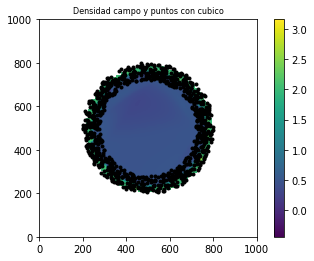

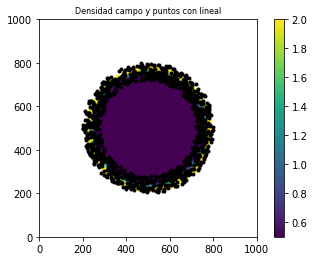

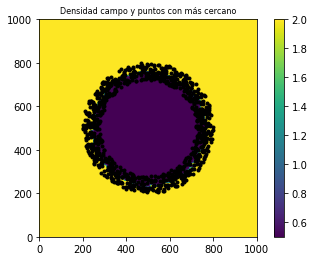

In [19]:

fig, ax = plt.subplots()
im = ax.imshow(zi_cubic_anillo,extent=[0,1000,0,1000])
plt.plot(x2,y2,'k.')
plt.colorbar(im)
plt.title('Densidad campo y puntos con cubico', fontsize=8)
plt.show()


fig, ax = plt.subplots()
im = ax.imshow(zi_linear_anillo,extent=[0,1000,0,1000])
plt.plot(x2,y2,'k.')
plt.colorbar(im)
plt.title('Densidad campo y puntos con lineal', fontsize=8)
plt.show()


fig, ax = plt.subplots()
im = ax.imshow(zi_nearest_anillo,extent=[0,1000,0,1000])
plt.plot(x2,y2,'k.')
plt.colorbar(im)
plt.title('Densidad campo y puntos con más cercano', fontsize=8)
plt.show()



### b) Calcula la función de correlación (estimador de Landy-Salay) para ambas muestras de datos usando los putos de la malla, y asignando un peso en cada punto dado por el valor del campo en ese punto. Grafica la función de correlación obtenida por este método de malla y compárala en la misma gráfica con la obtenida en base a los puntos originales. 

#### Función de correlación de mallas para multiples anillos

In [20]:


#cambio la estructura de los datos de la malla para que puedan procesarlo mis funciones de histogramas
zi_nearest_anillos = zi_nearest_anillos.flatten()
zi_linear_anillos = zi_linear_anillos.flatten()
zi_cubic_anillos = zi_cubic_anillos.flatten()

xi1=xi1.flatten()
yi1=yi1.flatten()


malla_anillos_c=np.c_[ xi1, yi1, zi_cubic_anillos ]
malla_anillos_l=np.c_[ xi1, yi1, zi_linear_anillos ]
malla_anillos_n=np.c_[ xi1, yi1, zi_nearest_anillos ]

malla_anillos_c=np.nan_to_num(malla_anillos_c)
malla_anillos_l=np.nan_to_num(malla_anillos_l)
malla_anillos_n=np.nan_to_num(malla_anillos_n)



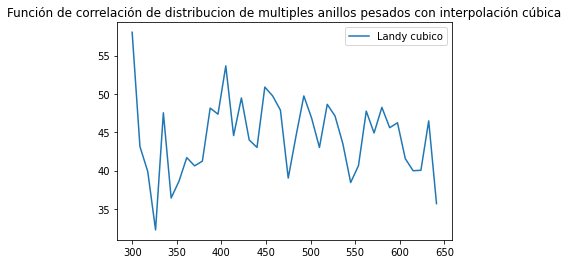

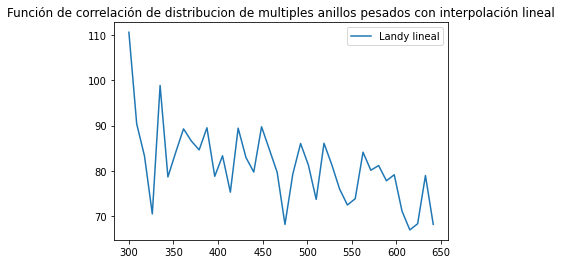

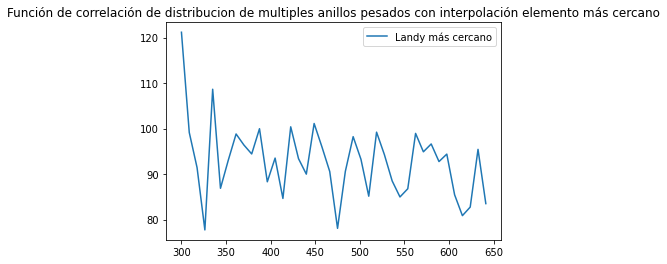

In [23]:
L=1000
Lmax=650
Lmin=300
num_bins=40

RR=DD_peso(len(datos_random),L,datos_random,num_bins, Lmax, Lmin)

malla_anillos_c_DD=DD_peso(len(malla_anillos_c),L,malla_anillos_c,num_bins, Lmax, Lmin)
malla_anillos_c_DR=DR_peso(len(datos_random),len(malla_anillos_c),L,datos_random,malla_anillos_c,num_bins,Lmax,Lmin)
FC_Landy_c=np.divide(malla_anillos_c_DD,RR)-2*np.divide(malla_anillos_c_DR,RR)+1
langs = np.arange(Lmin,Lmax,(Lmax-Lmin)/num_bins)
plt.plot(langs,FC_Landy_c,label='Landy cubico')
plt.legend()
plt.title('Función de correlación de distribucion de multiples anillos pesados con interpolación cúbica')
plt.show()


malla_anillos_l_DD=DD_peso(len(malla_anillos_l),L,malla_anillos_l,num_bins, Lmax, Lmin)
malla_anillos_l_DR=DR_peso(len(datos_random),len(malla_anillos_l),L,datos_random,malla_anillos_l,num_bins,Lmax,Lmin)
FC_Landy_l=np.divide(malla_anillos_l_DD,RR)-2*np.divide(malla_anillos_l_DR,RR)+1
plt.plot(langs,FC_Landy_l,label='Landy lineal')
plt.legend()
plt.title('Función de correlación de distribucion de multiples anillos pesados con interpolación lineal')
plt.show()

malla_anillos_n_DD=DD_peso(len(malla_anillos_n),L,malla_anillos_n,num_bins, Lmax, Lmin)
malla_anillos_n_DR=DR_peso(len(datos_random),len(malla_anillos_n),L,datos_random,malla_anillos_n,num_bins,Lmax,Lmin)
FC_Landy_n=np.divide(malla_anillos_n_DD,RR)-2*np.divide(malla_anillos_n_DR,RR)+1
plt.plot(langs,FC_Landy_n,label='Landy más cercano')
plt.legend()
plt.title('Función de correlación de distribucion de multiples anillos pesados con interpolación elemento más cercano')
plt.show()

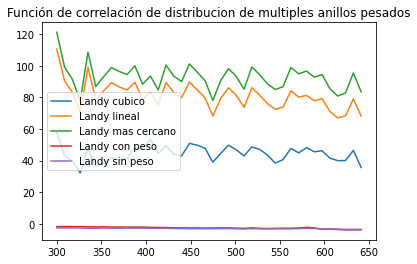

In [29]:
langs = np.arange(Lmin,Lmax,(Lmax-Lmin)/num_bins)
plt.plot(langs,FC_Landy_c,label='Landy cubico')
plt.plot(langs,FC_Landy_l,label='Landy lineal')
plt.plot(langs,FC_Landy_n,label='Landy mas cercano')
plt.plot(langs,FC_Landy_anillos,label='Landy con peso')
plt.plot(langs,FC_Landy2_anillos,label='Landy sin peso')

plt.legend()
plt.title('Función de correlación de distribucion de multiples anillos pesados')
plt.show()



#### Función de correlación de mallas para anillo

In [25]:

#cambio la estructura de los datos de la malla para que puedan procesarlo mis funciones de histogramas
zi_nearest_anillo = zi_nearest_anillo.flatten()
zi_linear_anillo = zi_linear_anillo.flatten()
zi_cubic_anillo = zi_cubic_anillo.flatten()

xi2=xi2.flatten()
yi2=yi2.flatten()


malla_anillo_c=np.c_[ xi2, yi2, zi_cubic_anillo ]
malla_anillo_l=np.c_[ xi2, yi2, zi_linear_anillo ]
malla_anillo_n=np.c_[ xi2, yi2, zi_nearest_anillo ]

malla_anillo_c=np.nan_to_num(malla_anillo_c)
malla_anillo_l=np.nan_to_num(malla_anillo_l)
malla_anillo_n=np.nan_to_num(malla_anillo_n)


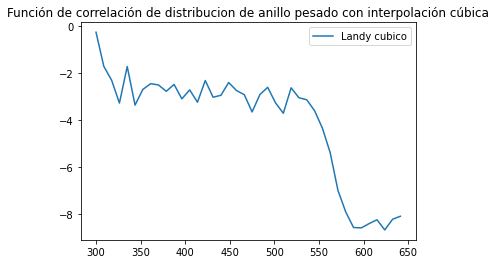

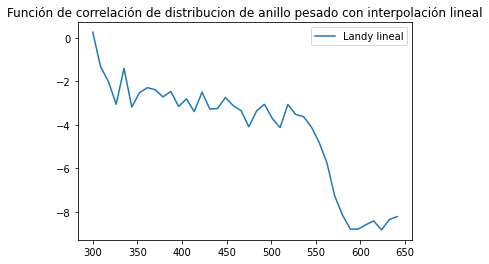

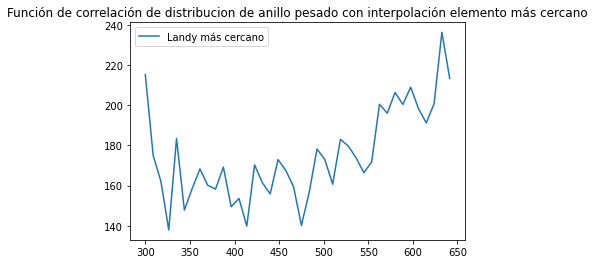

In [27]:
L=1000
Lmax=650
Lmin=300
num_bins=40

RR=DD_peso(len(datos_random),L,datos_random,num_bins, Lmax, Lmin)

malla_anillo_c_DD=DD_peso(len(malla_anillo_c),L,malla_anillo_c,num_bins, Lmax, Lmin)
malla_anillo_c_DR=DR_peso(len(datos_random),len(malla_anillo_c),L,datos_random,malla_anillo_c,num_bins,Lmax,Lmin)
FC_Landy_c2=np.divide(malla_anillo_c_DD,RR)-2*np.divide(malla_anillo_c_DR,RR)+1
langs = np.arange(Lmin,Lmax,(Lmax-Lmin)/num_bins)
plt.plot(langs,FC_Landy_c2,label='Landy cubico')
plt.legend()
plt.title('Función de correlación de distribucion de anillo pesado con interpolación cúbica')
plt.show()


malla_anillo_l_DD=DD_peso(len(malla_anillo_l),L,malla_anillo_l,num_bins, Lmax, Lmin)
malla_anillo_l_DR=DR_peso(len(datos_random),len(malla_anillo_l),L,datos_random,malla_anillo_l,num_bins,Lmax,Lmin)
FC_Landy_l2=np.divide(malla_anillo_l_DD,RR)-2*np.divide(malla_anillo_l_DR,RR)+1
plt.plot(langs,FC_Landy_l2,label='Landy lineal')
plt.legend()
plt.title('Función de correlación de distribucion de anillo pesado con interpolación lineal')
plt.show()

malla_anillo_n_DD=DD_peso(len(malla_anillo_n),L,malla_anillo_n,num_bins, Lmax, Lmin)
malla_anillo_n_DR=DR_peso(len(datos_random),len(malla_anillo_n),L,datos_random,malla_anillo_n,num_bins,Lmax,Lmin)
FC_Landy_n2=np.divide(malla_anillo_n_DD,RR)-2*np.divide(malla_anillo_n_DR,RR)+1
plt.plot(langs,FC_Landy_n2,label='Landy más cercano')
plt.legend()
plt.title('Función de correlación de distribucion de anillo pesado con interpolación elemento más cercano')
plt.show()

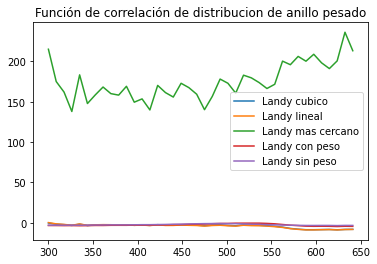

In [30]:
langs = np.arange(Lmin,Lmax,(Lmax-Lmin)/num_bins)
plt.plot(langs,FC_Landy_c2,label='Landy cubico')
plt.plot(langs,FC_Landy_l2,label='Landy lineal')
plt.plot(langs,FC_Landy_n2,label='Landy mas cercano')
plt.plot(langs,FC_Landy,label='Landy con peso')
plt.plot(langs,FC_Landy2,label='Landy sin peso')
plt.legend()
plt.title('Función de correlación de distribucion de anillo pesado')
plt.show()

Al graficar junto los espectros de potencia de las mallas y de los puntos no se puede apreciar mucho la estructura por la diferencia de escalas de la gráfica, pero viendo las gráficas que se obtuvieron de los puntos y de las mallas por separado no muestran una estructura parecida

### c) Calcula la transformada de Fourier de este campo discreto (ie de la malla) para ambas muestras de datos, y obtén los espectros de potencia como el valor de expectación del producto de dos campos en este espacio de Fourier. Gráfica tanto el campo en el espacio de Fourier, como el espectro de potencias. ¿Cómo cambian los resultados del espectro de potencias con los diferentes métodos de interpolación?

In [33]:
def PowerSpec(N,L,datos, num_bins): #función que calcula el espectro de potencias en una dirección de 45 grados
    rango=2*np.pi/L

    k=np.zeros(shape=(num_bins,2), dtype=float)
    for i in range(num_bins):
        k[i]=[i*rango,i*rango]
    k_mag=np.sqrt(np.multiply(k,k))

    d=2
    A,B=0.0, 0.0        
    X2=np.zeros(shape=(num_bins), dtype=float)
    for j in range(num_bins):
        for i in range(N):
                    A+=np.cos(np.dot(k[j],datos[i,:2]))
                    B+=-np.sin(np.dot(k[j],datos[i,:2]))
        X2[j]=(A/N)**2 +(B/N)**2
    P=L**d *X2 -L**d /N
    return P, k_mag


#### Campo de anillo

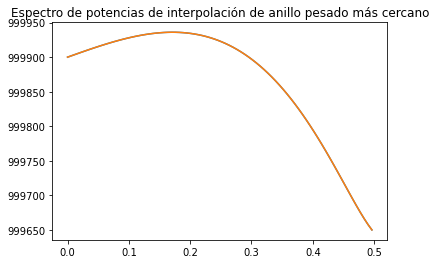

In [34]:
num_bins=80
L=1000

power_anillo_n, K_anillo_n=PowerSpec(len(malla_anillo_n[:,0]),1000,malla_anillo_n,num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K_anillo_n,power_anillo_n)
plt.title('Espectro de potencias de interpolación de anillo pesado más cercano')
plt.show()

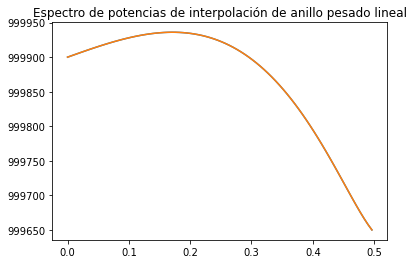

In [35]:
num_bins=80
L=1000

power_anillo_l, K_anillo_l=PowerSpec(len(malla_anillo_l[:,0]),1000,malla_anillo_l,num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K_anillo_l,power_anillo_l)
plt.title('Espectro de potencias de interpolación de anillo pesado lineal')
plt.show()

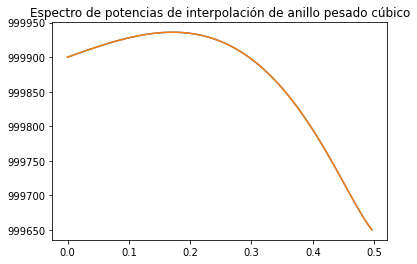

In [42]:
num_bins=80
L=1000

power_anillo_c, K_anillo_c=PowerSpec(len(malla_anillo_c[:,0]),1000,malla_anillo_c,num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K_anillo_c,power_anillo_c)
plt.title('Espectro de potencias de interpolación de anillo pesado cúbico')
plt.show()

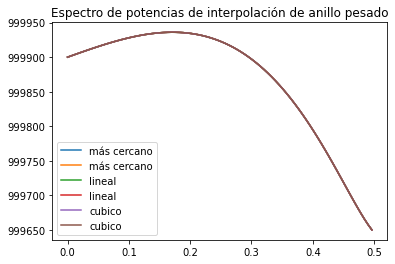

In [47]:
langs = np.arange(0,L,L/num_bins)
plt.plot(K_anillo_n,power_anillo_n, label='más cercano')
plt.plot(K_anillo_l,power_anillo_l, label='lineal')
plt.plot(K_anillo_c,power_anillo_c, label='cubico')
plt.legend()
plt.title('Espectro de potencias de interpolación de anillo pesado')
plt.show()

#### Campo de multiples anillos


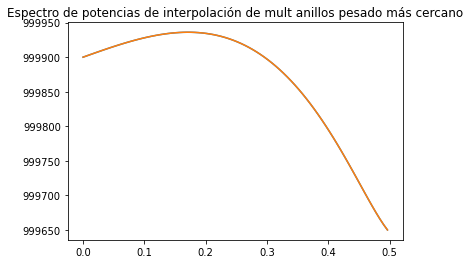

In [44]:
num_bins=80
L=1000

power_anillos_n, K_anillos_n=PowerSpec(len(malla_anillos_n[:,0]),1000,malla_anillos_n,num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K_anillos_n,power_anillos_n)
plt.title('Espectro de potencias de interpolación de mult anillos pesado más cercano')
plt.show()

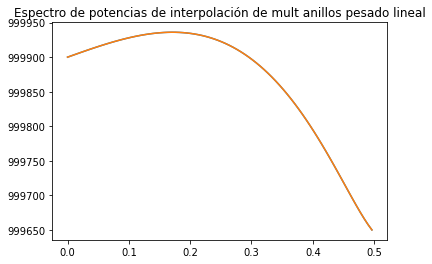

In [45]:
num_bins=80
L=1000

power_anillos_l, K_anillos_l=PowerSpec(len(malla_anillos_l[:,0]),1000,malla_anillos_l,num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K_anillos_l,power_anillos_l)
plt.title('Espectro de potencias de interpolación de mult anillos pesado lineal')
plt.show()

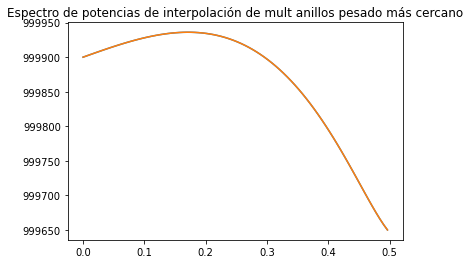

In [46]:
num_bins=80
L=1000

power_anillos_c, K_anillos_c=PowerSpec(len(malla_anillos_c[:,0]),1000,malla_anillos_c,num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K_anillos_c,power_anillos_c)
plt.title('Espectro de potencias de interpolación de mult anillos pesado más cercano')
plt.show()

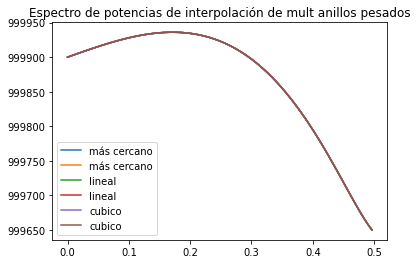

In [48]:
langs = np.arange(0,L,L/num_bins)
plt.plot(K_anillos_n,power_anillos_n, label='más cercano')
plt.plot(K_anillos_l,power_anillos_l, label='lineal')
plt.plot(K_anillos_c,power_anillos_c, label='cubico')
plt.legend()
plt.title('Espectro de potencias de interpolación de mult anillos pesados')
plt.show()